In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
wine = pd.read_csv('white_wine.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


In [4]:
wine['label'] = np.where(wine['quality'] > 6, 1, 0)

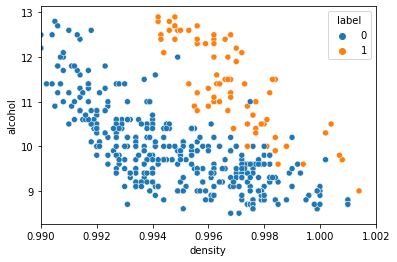

In [7]:
sns.scatterplot(x = 'density', y='alcohol', data=wine, hue='label')
plt.xlim(0.990,1.002)
plt.show()

In [21]:
wine[['alcohol', 'density']].describe()

,alcohol,density
count,520.000000,520.000000
mean,10.119461,0.995374
std,1.086787,0.002613
min,8.500000,0.989900
25%,9.300000,0.993400
50%,9.900000,0.995400
75%,10.700000,0.997400
max,12.900000,1.003300


In [8]:
wine[['alcohol', 'density']].isnull().sum()

alcohol    1
density    0
dtype: int64

In [9]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)

In [10]:
wine[['alcohol', 'density']].isnull().sum()

alcohol    0
density    0
dtype: int64

In [12]:
X = wine[['alcohol', 'density']]
y = wine['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2021)

> ## Without Scalling

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [14]:
print('KNN(3) Accuracy Score:', accuracy_score(y_test, y_pred))

KNN(3) Accuracy Score: 0.8942307692307693


In [22]:
confusion_matrix(y_test, y_pred)

array([[80,  4],
       [ 7, 13]], dtype=int64)

> ## With Scalling

In [15]:
from sklearn.preprocessing import MinMaxScaler

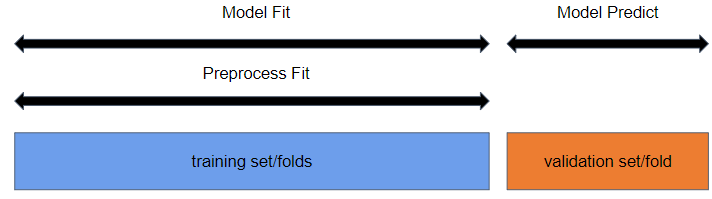

In [18]:
scaler = MinMaxScaler()
scaler.fit(X_train) #preprocess fit
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

In [20]:
print('KNN with scaled data accuracy score:', accuracy_score(y_test, y_pred_scaled))

KNN with scaled data accuracy score: 0.9807692307692307


In [23]:
confusion_matrix(y_test, y_pred_scaled)

array([[84,  0],
       [ 2, 18]], dtype=int64)

> ## Choose Factor K

In [24]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn_ = KNeighborsClassifier(n_neighbors=i)
    knn_.fit(X_train_scaled, y_train)
    
    y_predict_train = knn_.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = knn_.predict(X_test_scaled)
    testing_accuracies.append(accuracy_score(y_test, y_predict_test))
    
    acc_score = accuracy_score(y_test, y_predict_test)
    
    if score < acc_score:
        score = acc_score
        best_k = i

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


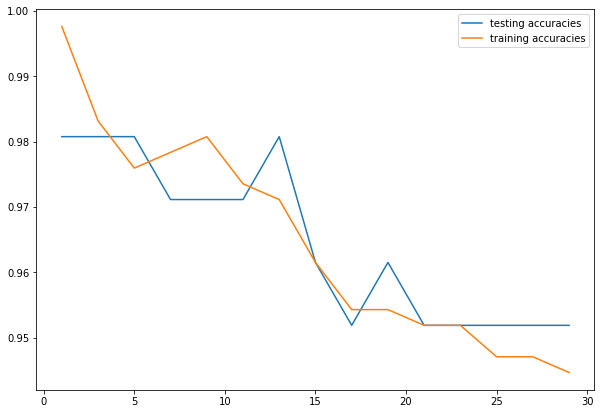

In [26]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies, markers=training_accuracies)
sns.lineplot(k, training_accuracies, markers=training_accuracies)
plt.legend(['testing accuracies', 'training accuracies'])
plt.show()

In [27]:
print('best_k:', best_k)
print('best_score:', score)

best_k: 1
best_score: 0.9807692307692307


In [28]:
testing_accuracies

[0.9807692307692307,
 0.9807692307692307,
 0.9807692307692307,
 0.9711538461538461,
 0.9711538461538461,
 0.9711538461538461,
 0.9807692307692307,
 0.9615384615384616,
 0.9519230769230769,
 0.9615384615384616,
 0.9519230769230769,
 0.9519230769230769,
 0.9519230769230769,
 0.9519230769230769,
 0.9519230769230769]